In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("BankChurners.csv",index_col="CLIENTNUM")
#Data imported and CLIENTNUM made index column.

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# I will look at unique values of 4 features.
print(df.Attrition_Flag.unique())
print(df.Income_Category.unique())
print(df.Education_Level.unique())
print(df.Card_Category.unique())

['Existing Customer' 'Attrited Customer']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
Attrition_ordinal={"Attrited Customer":0, "Existing Customer":1}
df["Attrition_Flag"]=df["Attrition_Flag"].replace(Attrition_ordinal)

In [ ]:
Income_ordinal={"Unknown":0,"Less than $40K":1, "$40K - $60K":2,"$60K - $80K":3,"$80K - $120K":4,"$120K +":5}
df["Income_Category"]=df["Income_Category"].replace(Income_ordinal)

In [ ]:
Education_label= {"Unknown":0 ,"Uneducated":1,"High School":2,"College":3,"Graduate" :4,"Post-Graduate":5,"Doctorate":6}
df["Education_Level"]=df["Education_Level"].replace(Education_label)

In [ ]:
Card_label={"Blue":0, "Silver":1,"Gold":2, "Platinum":3}
df["Card_Category"]=df["Card_Category"].replace(Card_label)

Ordinal Features are sorted manually.

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,1,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,1,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,1,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,1,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,1,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#There are still categorical variables are exist
#Because of that, I will make onehot encoding 
df_wdums=pd.get_dummies(df,drop_first=True)

In [ ]:
df_wdums.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1,0,0
818770008,1,49,5,4,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
713982108,1,51,3,4,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,1,0,0
769911858,1,40,4,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
709106358,1,40,3,1,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,1,0,0


In [ ]:
df_wdums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Income_Category           10127 non-null  int64  
 5   Card_Category             10127 non-null  int64  
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64

Okay, there are no categorical variables anymore.

In [ ]:
# I will scale the data between 0-1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df_wdums)
df_scaled =pd.DataFrame(df_scaled, columns = df_wdums.columns)
df_scaled.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1.0,0.404255,0.6,0.333333,0.6,0.0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,1.0,1.0,0.0,0.0
1,1.0,0.489362,1.0,0.666667,0.2,0.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0.0,0.0,1.0,0.0
2,1.0,0.531915,0.6,0.666667,0.8,0.0,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,1.0,1.0,0.0,0.0
3,1.0,0.297872,0.8,0.333333,0.2,0.0,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.0,0.0,0.0,1.0
4,1.0,0.297872,0.6,0.166667,0.6,0.0,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,1.0,1.0,0.0,0.0


In [ ]:
#I will try k values between 2-10 for clustering algorithm. 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ks=np.arange(2,11)
inertia_list = []
silhouette_list = []

for k in ks:
  kmean=KMeans(n_clusters=k,n_init=5, init="k-means++")
  kmean.fit(df_scaled)
  inertia_list.append(kmean.inertia_)
  sil_score=silhouette_score(df_scaled,kmean.labels_)
  silhouette_list.append(sil_score)

silhouette_list

[0.21058781010264202,
 0.20176533964945456,
 0.21228997800128263,
 0.22907057380589418,
 0.22632396867966312,
 0.22373465340883725,
 0.18720962788555556,
 0.19737867823557964,
 0.1980107227196628]

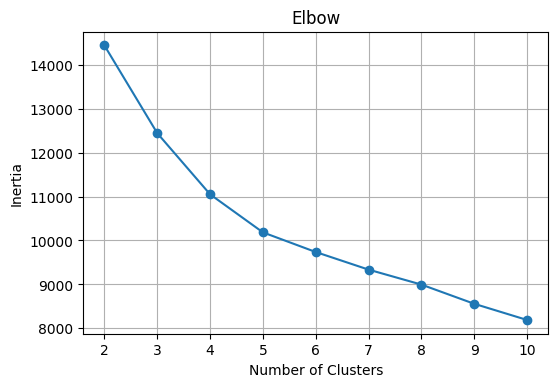

In [ ]:
#I will plot x=ks, y=inertia_list, 
#because I want to see inflection point.
plt.figure(dpi = 100)
plt.plot(ks,inertia_list,marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow")
plt.grid()
plt.show()

k=5 may be elbow.

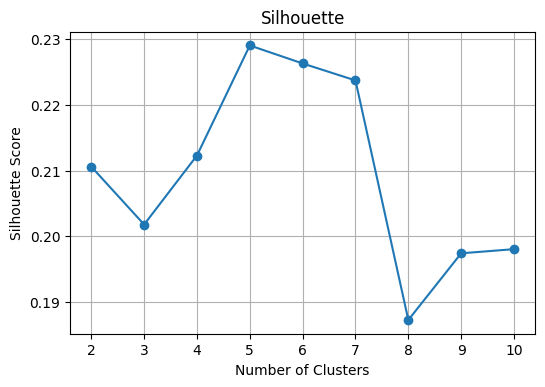

In [ ]:
#I will plot x=ks, y=silhouette_list,
#because I want to see which silhouette 
#scoremore higher for which k.
plt.figure(dpi = 100)
plt.plot(ks, silhouette_list, marker ="o")
plt.title("Silhouette")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

I will choose k=5 because silhouette score higher than other values. Also, it seems an inflection at point k=5 according to the elbow method. 

In [ ]:
#I rerunned clustering algorithm with best k value(5)
kmean=KMeans(n_clusters=5, n_init=5, init="k-means++")
kmean.fit(df_scaled)

KMeans(n_clusters=5, n_init=5)

In [ ]:
serie=["first","second","third","fourth","fifth"]
df_centers=pd.DataFrame(kmean.cluster_centers_, index=serie, columns=df_scaled.columns)

df_centers

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
first,0.836036,0.410811,0.492973,0.431231,0.493514,0.039339,0.513786,0.558739,0.384384,0.403303,0.286423,0.453831,0.283001,0.221460,0.232897,0.440659,0.190629,0.227674,6.441441e-01,-4.440892e-15,3.441691e-15,6.747748e-01
second,0.831905,0.446618,0.468707,0.443152,0.198776,0.013600,0.545055,0.567442,0.389433,0.397933,0.096989,0.455135,0.101350,0.224889,0.200213,0.416024,0.192892,0.354351,1.360023e-14,1.000000e+00,-4.385381e-15,1.457168e-15
third,0.842134,0.432296,0.454565,0.433077,0.653465,0.043638,0.536355,0.558636,0.389439,0.413183,0.361985,0.451237,0.355610,0.221431,0.235407,0.440790,0.190810,0.185124,1.000000e+00,5.662137e-15,1.000000e+00,1.110223e-15
fourth,0.867174,0.435200,0.478265,0.432245,0.672361,0.031157,0.534166,0.569052,0.388342,0.422257,0.314362,0.498098,0.306550,0.230050,0.207769,0.384473,0.192508,0.219335,1.000000e+00,1.000000e+00,-1.554312e-15,1.360023e-15
fifth,0.821258,0.425922,0.461863,0.427150,0.198248,0.022426,0.527144,0.556369,0.395701,0.408373,0.113751,0.447902,0.117942,0.219557,0.219843,0.452538,0.191205,0.333764,1.387779e-14,1.010303e-14,8.459395e-01,1.484923e-15


In [ ]:
print(df_centers.Attrition_Flag.max())
print(df_centers.Attrition_Flag.min())

0.8671735241502688
0.8212579617834406


Bank loses **less** customer from **fourth** group


Bank loses  **more** customer from **fifth** group

-Age; is small factor, elders are more loyal to the bank.

-Number of Dependents; is small factor, when numbers of dependents increase, loyalty increase too. 

-Education level; is small factor, when education level more higher, loyalty higher too.

**-Income; very important factor, customers which have higher incomes more loyal to the bank.**

**-Card Category; is important factor, when categories change through blue to platinum, loyalty increasing.**

-Period of relationship with bank; is small factor, when periods more often, loyalty is higher.

-Total number of products held by the customer;is small factor, when increasing, loyalty increasing too.

-Number of months inactive in the last 12 months; is small factor, when decreasing, loyalty increasing.

-Number of Communications in the last 12 months; is small factor, when increasing, loyalty increasing too.

**-Credit_Limit; very important factor, when credit limit increasing, loyalty increasing too.**


-Total Revolving Balance on the Credit Card; is a small factor, when increasing, loyalty increasing too.

**-Open to Buy Credit Line (Average of last 12 months); is very important factor, when increasing, loyalty increasing too.**

-Change in Transaction Amount (Q4 over Q1);is small factor, when increasing, loyalty increasing too.

-Total Transaction Amount (Last 12 months); is small factor, when decreasing, loyalty increasing.

-Total Transaction Count (Last 12 months);is small factor, when decreasing, loyalty increasing.

-Change in Transaction Count (Q4 over Q1); is a small factor, when increasing, loyalty increasing too.

**-Average Card Utilization Ratio; is important factor, when decreasing loyalty increasing.**

**-Gender and Marital status very important factor, males and/or married people more loyal to the bank.**